In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
df.tail()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
100,wren,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2


In [5]:
df.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
df.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [7]:
df.shape

(101, 18)

In [8]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [9]:
X=df.iloc[:,1:17]
Y=df.iloc[:,17:]
Y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [11]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
MM_X = MM.fit_transform(X)
import warnings
warnings.filterwarnings("ignore")

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Train_Acc = []
Test_Acc = []
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(MM_X,Y, test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors=10,p=1) # p=2 --> Eucledian
    knn.fit(X_train,Y_train)
    Y_pred_train = knn.predict(X_train)
    Y_pred_test = knn.predict(X_test)
    ac1 = accuracy_score(Y_train,Y_pred_train)
    ac2 = accuracy_score(Y_test,Y_pred_test)
    Train_Acc.append(ac1)
    Test_Acc.append(ac2)
print("Training accuracy: ", np.mean(ac1.round(2)))
print("Test accuracy: ", np.mean(ac2.round(2)))

Training accuracy:  0.91
Test accuracy:  0.84


# Glass

In [13]:
df=pd.read_csv("glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [14]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [15]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [16]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [17]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [18]:
df.shape

(214, 10)

In [19]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

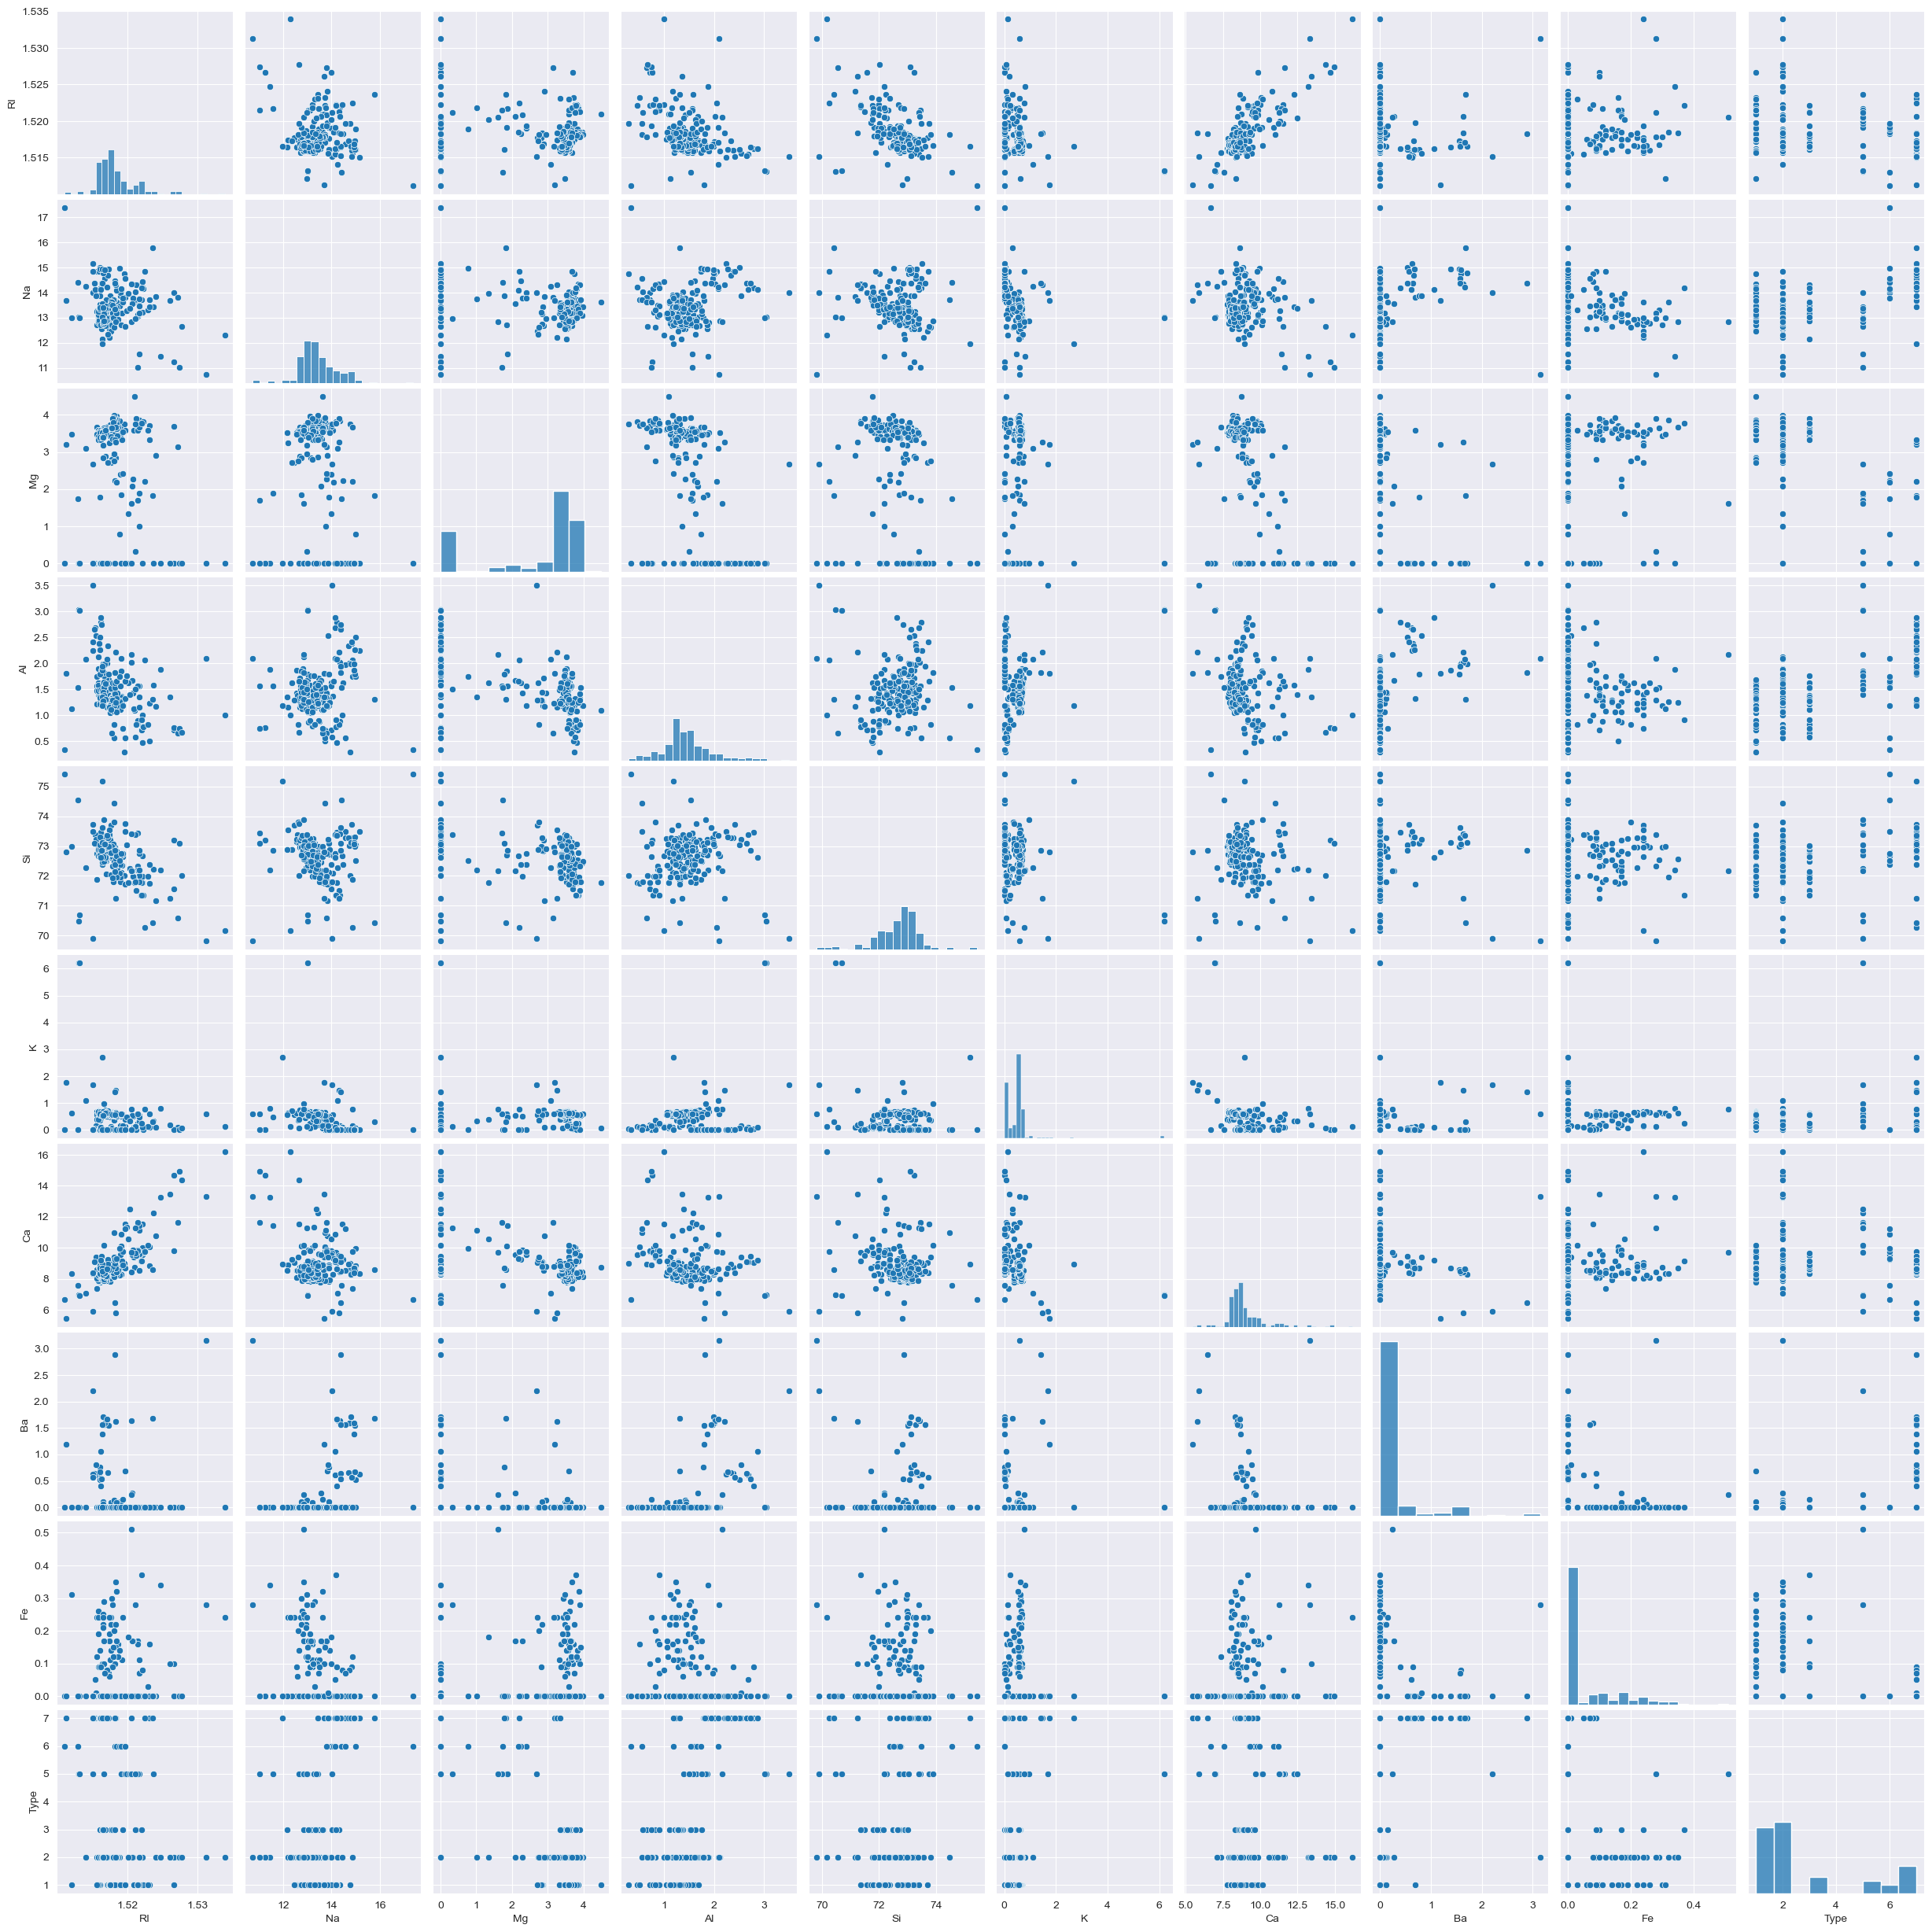

In [20]:
import seaborn as sns
sns.set_style(style="darkgrid")
sns.pairplot(df)

In [21]:
X=df.iloc[:,0:9]

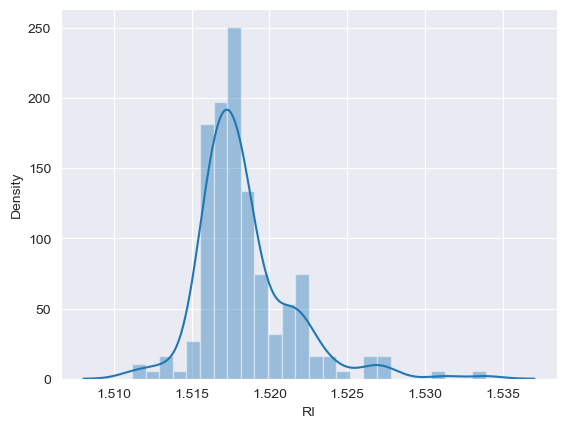

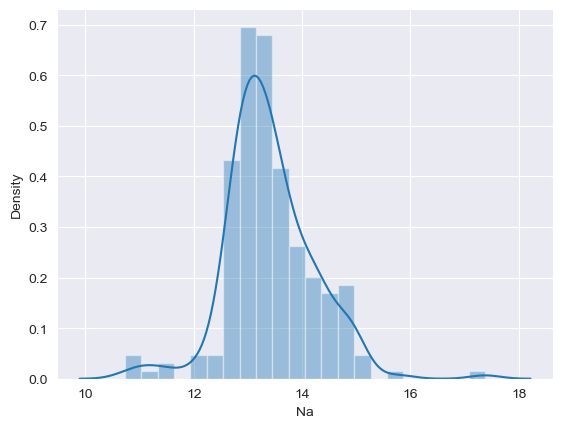

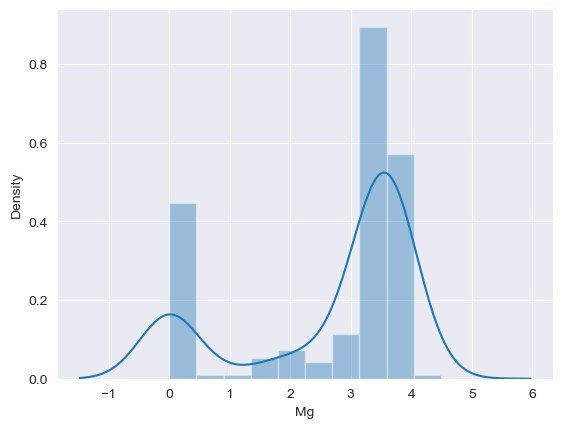

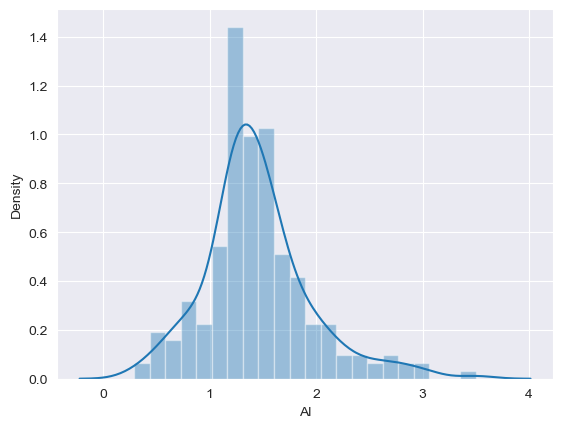

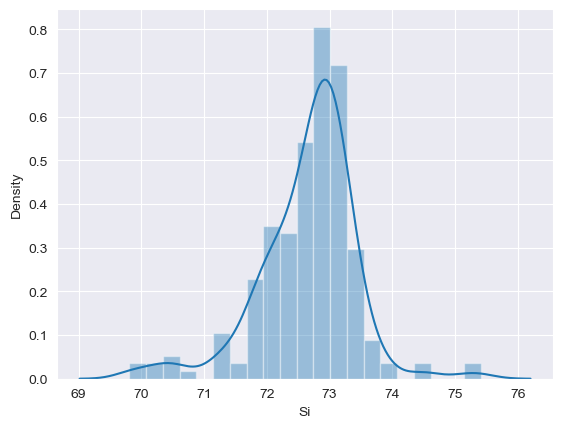

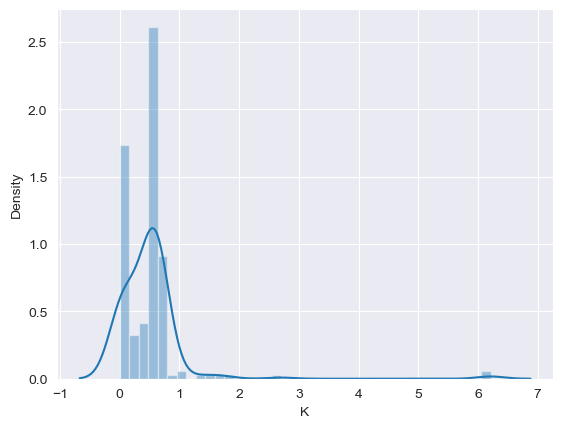

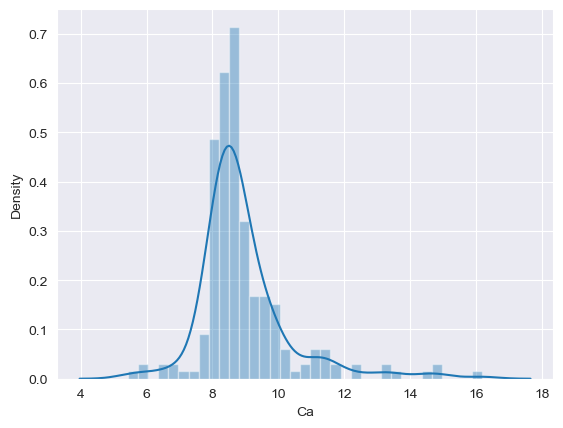

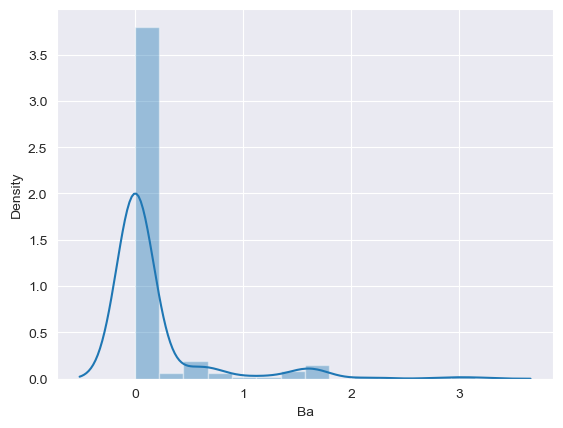

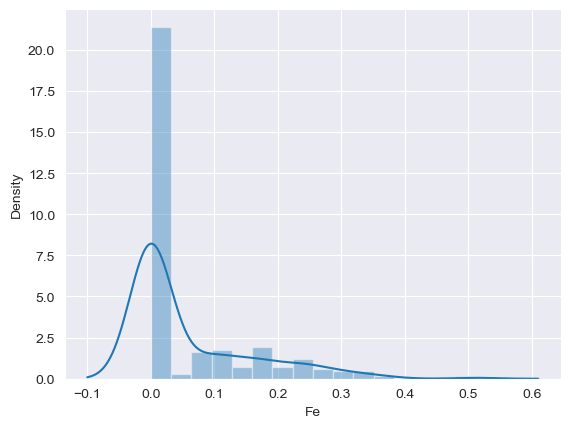

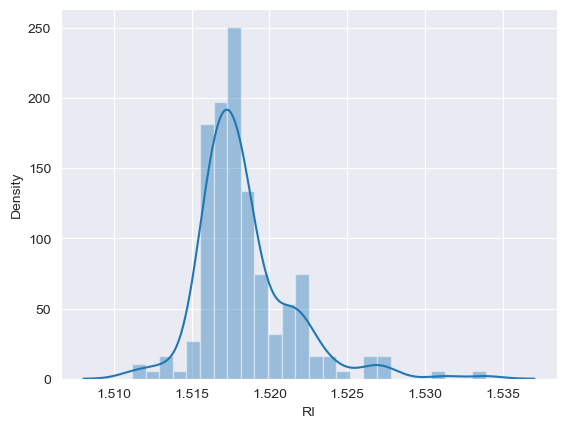

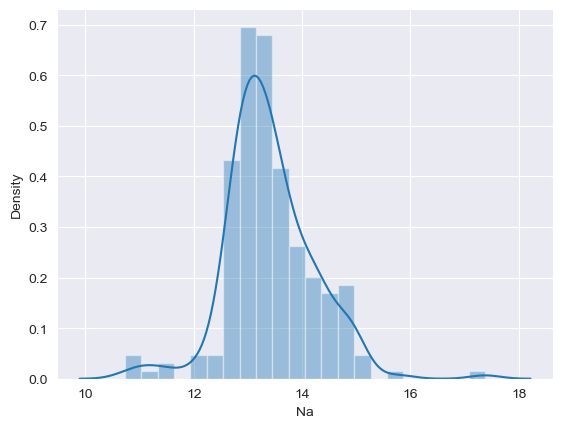

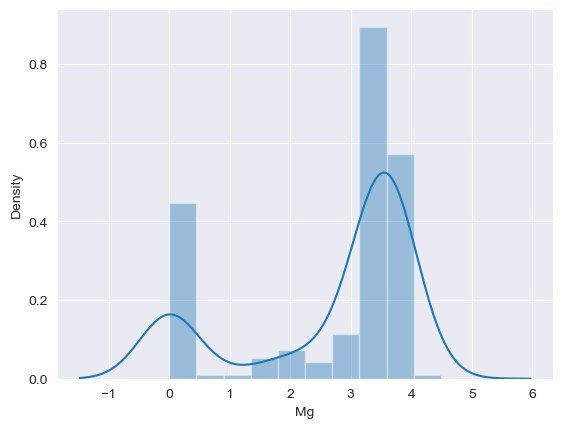

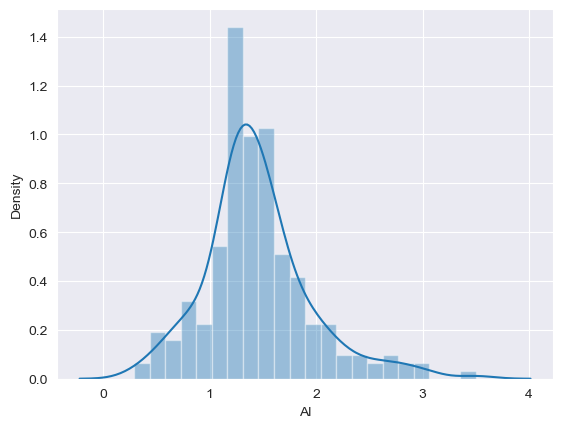

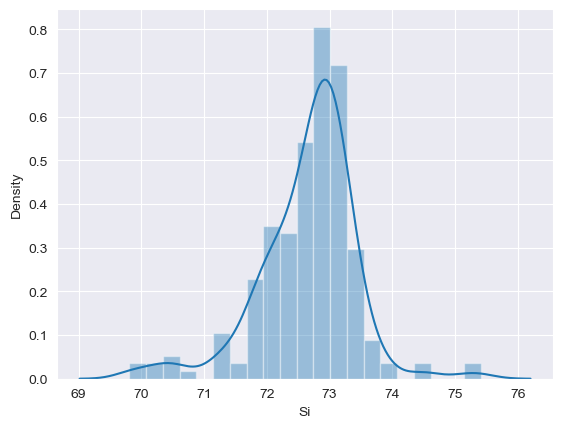

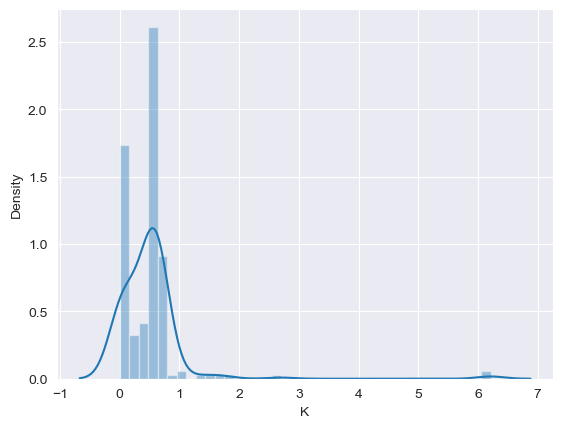

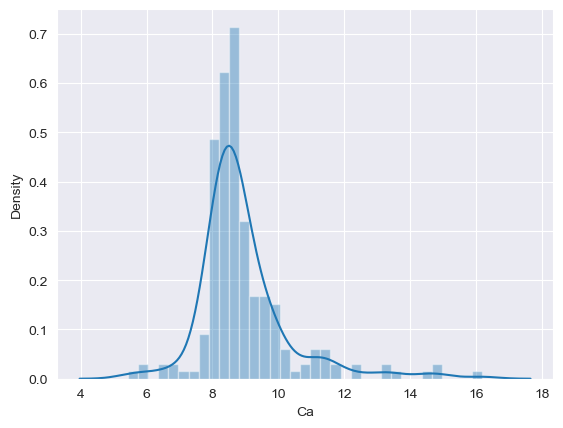

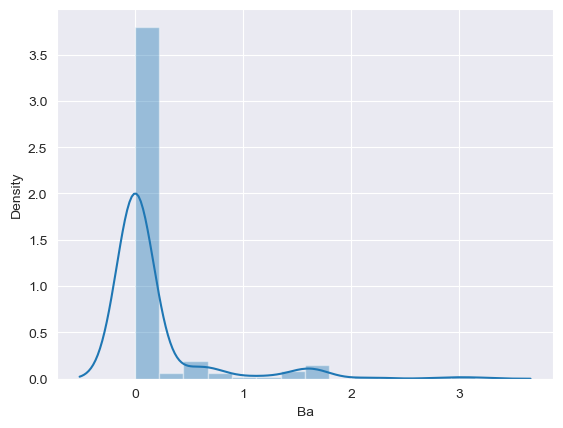

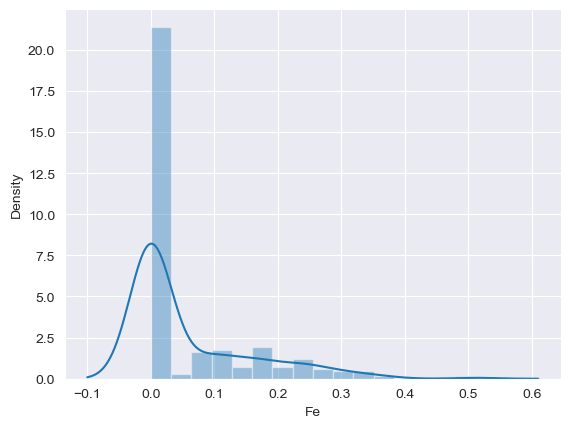

In [23]:
import matplotlib.pyplot as plt
for i in X:
    sns.distplot(X[i])
    plt.show()
import warnings
warnings.filterwarnings('ignore')

In [25]:
# scaling
Y = df["Type"]
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
MM_X = MM.fit_transform(X)
MM_X

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [26]:
# cross validation
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Train_Acc = []
Test_Acc = []
for i in range(1,500):
    X_train,X_test,Y_train,Y_test = train_test_split(MM_X,Y, test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=3,p=2) # p=2 --> Eucledian
    knn.fit(X_train,Y_train)
    Y_pred_train = knn.predict(X_train)
    Y_pred_test = knn.predict(X_test)
    ac1 = accuracy_score(Y_train,Y_pred_train)
    ac2 = accuracy_score(Y_test,Y_pred_test)
    Train_Acc.append(ac1)
    Test_Acc.append(ac2)
print("Training accuracy: ", np.mean(ac1.round(2)))
print("Test accuracy: ", np.mean(ac2.round(2)))

Training accuracy:  0.83
Test accuracy:  0.77


In [27]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
Loo=LeaveOneOut()
acc1=np.zeros(shape=(214),dtype=float)
acc2=np.zeros(shape=(214),dtype=float)
for train_index, test_index in Loo.split(X):
    X_train, X_test = MM_X[train_index], MM_X[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    m1 = KNeighborsClassifier()
    m1.fit(X_train,Y_train)
    Y_pred_train = m1.predict(X_train)
    Y_pred_test = m1.predict(X_test)
    acc1[train_index] =accuracy_score(Y_train,Y_pred_train)
    acc2[test_index] = accuracy_score(Y_test,Y_pred_test)
print((acc1[train_index]).mean().round(2))
print((acc2[test_index]).mean().round(2))

0.79
1.0


In [28]:
from sklearn.model_selection import KFold
KF= KFold(n_splits=5)
from sklearn.metrics import accuracy_score
accuracy_train=[]
accuracy_test=[]
for train_index,test_index in KF.split(X):
    X_train, X_test = MM_X[train_index], MM_X[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    m2 = KNeighborsClassifier()
    m2.fit(X_train,Y_train)
    Y_pred_train = m2.predict(X_train)
    Y_pred_test = m2.predict(X_test)
    accuracy_train.append(accuracy_score(Y_train,Y_pred_train))
    accuracy_test.append(accuracy_score(Y_test,Y_pred_test))

print('Training accuracy: ',accuracy_train)
print('Testing accuracy: ',accuracy_test)
print(np.mean(accuracy_train))
print(np.mean(accuracy_test))

Training accuracy:  [0.7777777777777778, 0.783625730994152, 0.7777777777777778, 0.8245614035087719, 0.7732558139534884]
Testing accuracy:  [0.3023255813953488, 0.7441860465116279, 0.2558139534883721, 0.23255813953488372, 0.047619047619047616]
0.7873997008023935
0.3165005537098561


In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss_X = ss.fit_transform(X)
ss_X

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Train_Acc = []
Test_Acc = []
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(ss_X,Y, test_size=0.2)
    knn1 = KNeighborsClassifier(n_neighbors=2,p=2) # p=2 --> Eucledian
    knn1.fit(X_train,Y_train)
    Y_pred_train = knn1.predict(X_train)
    Y_pred_test = knn1.predict(X_test)
    ac1 = accuracy_score(Y_train,Y_pred_train)
    ac2 = accuracy_score(Y_test,Y_pred_test)
    Train_Acc.append(ac1)
    Test_Acc.append(ac2)
print("Training accuracy: ", np.mean(ac1.round(2)))
print("Test accuracy: ", np.mean(ac2.round(2)))

Training accuracy:  0.84
Test accuracy:  0.63


In [31]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
Loo=LeaveOneOut()
acc1=np.zeros(shape=(214),dtype=float)
acc2=np.zeros(shape=(214),dtype=float)

In [32]:
for train_index, test_index in Loo.split(X):
    X_train, X_test = ss_X[train_index], ss_X[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    m1 = KNeighborsClassifier()
    m1.fit(X_train,Y_train)
    Y_pred_train = m1.predict(X_train)
    Y_pred_test = m1.predict(X_test)
    acc1[train_index] =accuracy_score(Y_train,Y_pred_train)
    acc2[test_index] = accuracy_score(Y_test,Y_pred_test)
print((acc1[train_index]).mean().round(2))
print((acc2[test_index]).mean().round(2))

0.78
1.0


In [33]:
from sklearn.model_selection import KFold
KF= KFold(n_splits=5)
from sklearn.metrics import accuracy_score
accuracy_train=[]
accuracy_test=[]
for train_index,test_index in KF.split(X):
    X_train, X_test = ss_X[train_index], ss_X[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]
    m2 = KNeighborsClassifier()
    m2.fit(X_train,Y_train)
    Y_pred_train = m2.predict(X_train)
    Y_pred_test = m2.predict(X_test)
    accuracy_train.append(accuracy_score(Y_train,Y_pred_train))
    accuracy_test.append(accuracy_score(Y_test,Y_pred_test))

print('Training accuracy: ',accuracy_train)
print('Testing accuracy: ',accuracy_test)
print(np.mean(accuracy_train))
print(np.mean(accuracy_test))

Training accuracy:  [0.7719298245614035, 0.7777777777777778, 0.7953216374269005, 0.8245614035087719, 0.7674418604651163]
Testing accuracy:  [0.27906976744186046, 0.6976744186046512, 0.3023255813953488, 0.2558139534883721, 0.023809523809523808]
0.787406500747994
0.3117386489479513
